## Scikit-Learn é uma biblioteca que facilita a prototipação de modelos em aprendizado de máquina.

A prototipação de modelos de aprendizado de máquina podem ser custosas se não forem utilizadas ferramentas apropriadas. Scikit-Learn se tornou a biblioteca mais comum para aprendizado de máquina em Python, e a maioria das outras bibliotecas fazem integração com ela.

Essa biblioteca permite trabalhar os dados, limpá-los, criar modelos e utilizar diversos métodos de aprendizagem com poucas linhas de código.

## Carregando os dados prontos do Scikit-Learn

A biblioteca também conta com algumas bases de dados clássicas embutida dentro de sua implementação, portanto sem a necessidade de fazer download de arquivos externos. Essas bases estão disponíveis no módulo sklearn.datasets. A seguir, a base de dados IRIS é carregada:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Além do atributo *target_names*, a função *load_iris()* traz muitas informações e o próprio conjunto de dados. A seguir, é mostrado como acessar os atributos e as classes, bem como informações estatísticas da base.

In [2]:
data = iris.data # atributos
target = iris.target # classes

A descrição desses dados está disponível na própria página do Scikit-Learn:
[https://scikit-learn.org/stable/datasets/index.html#iris-dataset](http://)

Ao mostrar a primeira linha de dados, é possível observar que os valores são coerentes com a descrição da base, assim como é possível verificar a qual classe essa linha está associada:

In [3]:
print(data[0])
print(iris.target_names[target[0]])

[5.1 3.5 1.4 0.2]
setosa


Um experimento simples, porém completo, é separar os dados em treino e teste; em seguida, treinar um modelo com as informações de treino e aferir a performance do modelo no conjunto de teste. 

A função *train_test_split* facilita o processo de separação dados, pois é totalmente parametrizável. Essa e todas as outras funções do Scikit-Learn são bem documentadas e repletas de exemplo. Nesse caso, especificamente, a função precisa receber X e y (atributos e classe respectivamente), o tamanho da parcela que será usada para teste e o estado de aleatoriedade.

O estado de aleatoriedade é um número que serve como base para gerar os outros números aleatórios. Por exemplo, essa função *train_test_split* pode embaralhar as amostras se for desejado. Esse embaralhamento depende de um gerador randômico. 

**Mas como tornar esse experimento reprodutível se o gerador for randômico?** Basta especificar um random_state e mantê-lo, para que todas as operações que dependam de aleatoriedade sejam "fixas" nesse contexto, sem variação.

In [4]:
# separando os dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=42)

Como método de aprendizagem, vamos considerar os vizinhos próximos: k-NN. Os métodos de aprendizagem, assim como várias funções de fluxo de aprendizado de máquina dentro do Scikit-Learn herdam classes que têm as seguintes funcionalidades: fit, transform, fit_transform.

* Fit: Serve para ajustar um modelo aos dados
* Transform: Serve para ajustar os dados a um modelo
* Fit_Transform: Faz os dois anteriores de uma vez só

In [5]:
# treinando o modelo
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Em seguida, é necessário verificar se o modelo treinado tem uma boa performance, utilizando o modelo para predizer os rótulos dos dados de teste e conferindo-os com o gabarito. Uma outra facilidade do Scikit-Learn é a análise de resultados com as métricas prontas.
Mais informações podem ser obtidas em: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics](http://)

In [6]:
# predizendo
y_pred = knn.predict(X_test)

# comparando com gabarito
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9733333333333334

O resultado de acurácia em 98% é bastante expressivo normalmente, mas na base Iris é um resultado simplesmente satisfatório. Isso porque a base Iris é para propósitos didáticos e facilmente 'separável', então muitas configurações e mesmo outros tipos de divisão vão levar a resultados similares.

Algo importante de ser analisado, e bastante facilitado pelo Scikit-Learn, é o acerto e erro por classe. Para isso, é utilizada a matriz de confusão. Na forma mais simples, ela pode ser representada pela função *confusion_matrix* . Um exemplo retirado da documentação do Scikit-Learn permite uma visualização mais agradável. Ambos exemplos são dados a seguir.

In [7]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]


In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Gabarito')
    plt.xlabel('Predição')
    plt.tight_layout()


# calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Matriz de confusão sem normalização')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, normalize=True,
                      title='Matriz de confusão normalizada')

plt.show()

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

Uma análise mais detalhada por classe vai mostrar que a classe setosa é relativamente fácil de classificar, mas as outras duas têm sobreposição (versicolor e virgínica), o que leva a erros no método de aprendizagem dos vizinhos próximos. Para perceber isso mais claramente, vamos visualizar graficamente a distribuição das classes.

O número de dimensões é um problema a ser contornado. Visto que essa base tem 4 atributos, seria bastante complicado tentar visualizar os dados em sua forma original. **O que pode ser feito para visualizar um conjunto de dados em 2D é a redução de dimensionalidade.** Realizar isso no Scikit-Learn é relativamente simples devido à classe PCA.

Text(0.5,1,'PCA of IRIS dataset')

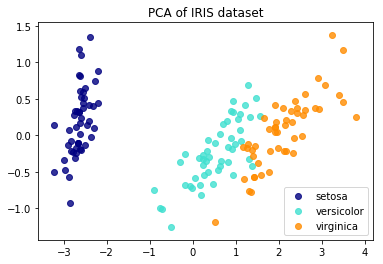

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(data)

colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_r[target == i, 0], X_r[target == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

Essa visualização também ajuda a perceber quando um método de divisão linear teria bom resultados. É possível perceber pela imagem que uma função linear conseguiria separar facilmente a classe setosa das demais, mas apenas uma função não-linear faria esse trabalho entre a versicolor e a virgínica nessa visualização.

Conclui-se aqui essa introdução sobre o Scikit-Learn, abordando alguns aspectos da biblioteca e facilidades, como:
* leitura de dados;
* divisão entre treino e teste;
* utilização de método de aprendizagem;
* métricas de avaliação de modelo; e
* redução de dimensionalidade.

# Exercícios

## (1) Recarregue os dados da Íris, divida o conjunto metade para treino e metade para teste. Em seguida, aplique o algoritmo KNN e verifique qual foi a acurácia obtida.

## (2) Ainda com os dados separados metade a metade, analise quais parâmetros do KNN podem ser modificados e se eles melhoram o resultado de acurácia. Procure mais informações na documentação do Scikit-Learn.

## (3) Exiba os dados em duas dimensões para cada conjunto (treino e teste) e verifique se a distribuição das classes continua similar à base original.

In [15]:
#1

iris2 = load_iris()

data2 = iris2.data # atributos
target2 = iris2.target # classes
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.95, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train2, y_train2)

y_pred2 = knn2.predict(X_test2)

# comparando com gabarito
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred2)

0.9300699300699301